Installing dependencies and setup


In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\User\AppData\Local\Temp\pip-install-fjyc03ry\tensorflow-gpu_c97c6624076e4c7b81bb05e98e94435c\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


In [2]:
!pip list


Package                      Version
---------------------------- ------------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
beautifulsoup4               4.12.2
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
coloredlogs                  15.0.1
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
et-xmlfile                   1.1.0
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.43.1
gast                         0.5.4
google-auth                  2.23.4
google-auth-oauthlib         1.1.0
google-pasta                 0.2.0
grpcio                       1.59.3
h5py                         3.10

In [3]:
import tensorflow as tf 
import os

In [4]:
os.path.join('data','happy')

'data\\happy'

In [5]:
gpus=tf.config.experimental.list_physical_devices("CPU")

In [6]:
len(gpus)

1

In [7]:
#limiting the gpu use if you have any to avoid OOM
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

Data Cleaning


In [8]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_13964\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
data_dir='data'

In [10]:
Image_exts=['jpeg','jpg','bmp','png']

In [11]:
os.listdir(data_dir)

['Happy', 'Sad']

In [12]:
os.listdir(os.path.join(data_dir,'happy'))#happy imaage directory

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '13ryLrJDyVF05wXDYYUXcJQ.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1zgJ8mDXVYwNY_5KkZr9Wzw.jpeg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '81BduzygJPL._AC_UF10001000_QL80_.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '960x0.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):#this allows us to get the path of the images class
        image_path=os.path.join(data_dir,image_class,image)#this allows us to get the path of each and every images 
        try:
            img=cv2.imread(image_path)#imread allows to open that imags
            tip=imghdr.what(image_path)
            if tip not in Image_exts:
                print("Image no tin ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with images {}".format(image_path))

In [14]:
happy_image_1=cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))#helps to read our imagaes in numpy array 

In [15]:
happy_image_1.shape #gives the result in the form of row column and channel

(3844, 5125, 3)

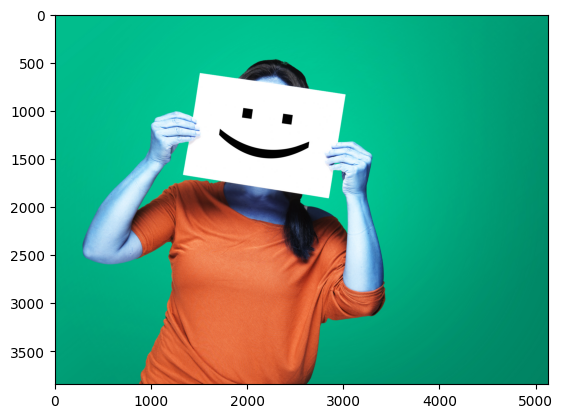

In [16]:
plt.imshow(happy_image_1) #wierd color because opencv use bgr

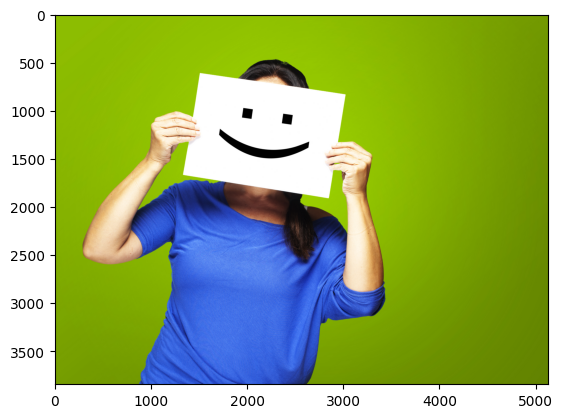

In [17]:
plt.imshow(cv2.cvtColor(happy_image_1,cv2.COLOR_BGR2RGB))

plt.show()

In [19]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [20]:
import numpy as np 

In [23]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [22]:
data=tf.keras.utils.image_dataset_from_directory('data') #this will direcilty create a dataset also apply bunch of data preprocessing to it

Found 168 files belonging to 2 classes.


The issue with this method of dataset cration is that we cannot directly assess the dataset by using data[0] so we need to first create a data iterator


In [24]:
data_iterator=data.as_numpy_iterator()

In [25]:
batch=data_iterator.next()

In [29]:
batch[0]#allowing us to access a batch 

array([[[[1.13000000e+02, 1.53000000e+02, 2.41000000e+02],
         [1.13000000e+02, 1.53000000e+02, 2.41000000e+02],
         [1.13000000e+02, 1.53000000e+02, 2.41000000e+02],
         ...,
         [1.37000000e+02, 8.40000000e+01, 2.54000000e+02],
         [1.37000000e+02, 8.40000000e+01, 2.54000000e+02],
         [1.37000000e+02, 8.40000000e+01, 2.54000000e+02]],

        [[1.13000000e+02, 1.53000000e+02, 2.41000000e+02],
         [1.13000000e+02, 1.53000000e+02, 2.41000000e+02],
         [1.13000000e+02, 1.53000000e+02, 2.41000000e+02],
         ...,
         [1.37000000e+02, 8.40000000e+01, 2.54000000e+02],
         [1.37000000e+02, 8.40000000e+01, 2.54000000e+02],
         [1.37000000e+02, 8.40000000e+01, 2.54000000e+02]],

        [[1.13000000e+02, 1.53000000e+02, 2.41000000e+02],
         [1.13000000e+02, 1.53000000e+02, 2.41000000e+02],
         [1.13000000e+02, 1.53000000e+02, 2.41000000e+02],
         ...,
         [1.37000000e+02, 8.40000000e+01, 2.54000000e+02],
         [

In [31]:
batch[0].shape #the pipeline code that is keras.utlis.image_dataset_from_direcotry create as bunch of batch size of 32 and images are resize to the size of 256 by 256 with 3 rgb channel

(32, 256, 256, 3)

to override the default batch size we can pass use the following code
tf.keras.utils.images_dataset_from_directory('data',batch_size=16)
as well as other images processing


len 2 represent the first one being numpy representaion of our images
2 represent label


In [32]:
len(batch)

2

In [33]:
batch[1] #these represents the labels

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0])